# Relatório de análise I

### Importando a Base de Dados

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('dados/aluguel.csv', sep=';')

### Informações gerais sobre a base de dados

In [3]:
dataset.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [4]:
# As colunas Valor , Condominio, IPTU possuem valores nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [5]:
tipos_dados = pd.DataFrame(dataset.dtypes, columns=['Tipos de dados'])
tipos_dados.columns.name = 'Variáveis'
tipos_dados

Variáveis,Tipos de dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [6]:
print('A base de dados apresenta {} registros (imóveis) e {} variáveis'.format(dataset.shape[0],dataset.shape[1]))

A base de dados apresenta 32960 registros (imóveis) e 9 variáveis


# Relatório de análise II

### Analisando os tipos de imóveis existentes

In [7]:
tipo_de_imovel = dataset['Tipo']

In [8]:
#Elimina os dados repetidos
tipo_de_imovel.drop_duplicates(inplace = True)
tipo_de_imovel

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

### Organizando a visualização

In [9]:
tipo_de_imovel = pd.DataFrame(tipo_de_imovel)
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])
tipo_de_imovel.columns.name = "Id"

In [10]:
tipo_de_imovel

Id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


### Criando dataframes de teste

In [11]:
dados = {'A': {'X': 1, 'Y': 3},
         'B': {'X': 2, 'Y': 4}}
df = pd.DataFrame(dados)
df

,A,B
X,1,2
Y,3,4


In [12]:
dados = [[1, 2, 3], [4, 5, 6]]
index = 'X,Y'.split(',')
columns = list('CBA')[::-1]
df = pd.DataFrame(dados, index, columns)
df

,A,B,C
X,1,2,3
Y,4,5,6


### Separando os imóveis residenciais

In [13]:
dataset.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [14]:
residencial = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Flat',
 'Casa de Vila',
 'Loft',
 'Studio']

In [15]:
selecao = dataset['Tipo'].isin(residencial)

In [16]:
dataset_residencial = dataset[selecao]
dataset_residencial.head(15)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [17]:
dataset_residencial.index = range(dataset_residencial.shape[0])
dataset_residencial.head(15)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


### Exportando a base de dados de imóveis residenciais

In [18]:
dataset_residencial.to_csv('Dados/aluguel_residencial.csv', sep=';',index=False)

In [19]:
dataset_residencial_exportado = pd.read_csv('Dados/aluguel_residencial.csv', sep=';')
dataset_residencial_exportado.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


# Relatório de análise III

In [20]:
#Selecione somente os imóveis classificados com tipo 'Apartamento'.

In [21]:
selecao1 = dataset_residencial['Tipo'] == 'Apartamento'

dataset_residencial[selecao1]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23104,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
23106,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23108,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23109,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [22]:
#Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.
selecao2 = (dataset_residencial['Tipo'] == 'Casa') | (dataset_residencial['Tipo'] == 'Casa de Condomínio') | (dataset_residencial['Tipo'] == 'Casa de Vila')
dataset_residencial[selecao2]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
15,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
19,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,NaN
...,...,...,...,...,...,...,...,...,...
23076,Casa de Condomínio,Freguesia (Jacarepaguá),3,3,1,155,2000.0,530.0,1250.0
23078,Casa,Bento Ribeiro,2,1,0,60,1400.0,NaN,NaN
23086,Casa de Condomínio,Barra da Tijuca,3,5,3,1000,20000.0,3000.0,NaN
23089,Casa,Centro,5,0,1,160,5000.0,NaN,80.0


In [23]:
#Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
selecao3 = (dataset_residencial['Area'] >= 60) & (dataset_residencial['Area'] <= 100)
dataset_residencial[selecao3]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
23099,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN
23101,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
23106,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23108,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


In [24]:
#Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.
selecao4 = (dataset_residencial['Quartos'] >= 4) & (dataset_residencial['Valor'] < 2000)
dataset_residencial[selecao4]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
492,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,NaN
1021,Apartamento,Taquara,4,1,1,110,1900.0,NaN,NaN
2003,Casa,Campo Grande,4,1,4,100,1600.0,NaN,NaN
2146,Casa,Engenho de Dentro,4,3,0,120,1500.0,NaN,NaN
2245,Apartamento,Recreio dos Bandeirantes,4,2,2,125,1700.0,NaN,90.0
2386,Casa de Vila,Méier,4,0,1,85,1600.0,NaN,NaN
4037,Casa,Campo Grande,4,1,0,140,1700.0,NaN,NaN
4038,Apartamento,Campo Grande,4,2,1,115,1900.0,500.0,NaN
4451,Apartamento,Recreio dos Bandeirantes,4,2,1,105,1900.0,1492.0,205.0
5205,Apartamento,Cidade Nova,4,0,0,110,1300.0,NaN,NaN


# Relatório de análise IV

### Limpando o dataset -> tirando valores nulos

In [25]:
#Coluna : valor
dataset_residencial[dataset_residencial['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
60,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1524,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1718,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2055,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2077,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
5060,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8779,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
9168,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9373,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


In [26]:
dataset_residencial.dropna(subset=['Valor'],inplace = True)

<ipython-input-26-19e7ce1e603f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_residencial.dropna(subset=['Valor'],inplace = True)


In [27]:
#Apartamento com condomínio nulo

selecao = (dataset_residencial['Tipo'] == 'Apartamento') & (dataset_residencial['Condominio'].isnull())
dataset_residencial[selecao]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
85,Apartamento,Praça Seca,2,0,0,80,1000.0,NaN,NaN
119,Apartamento,Rocha Miranda,2,1,0,50,1100.0,NaN,NaN
135,Apartamento,Barra da Tijuca,1,1,1,65,2350.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22856,Apartamento,Copacabana,3,0,0,130,4600.0,NaN,NaN
22885,Apartamento,Guadalupe,1,0,0,40,550.0,NaN,NaN
22902,Apartamento,Bonsucesso,1,0,0,60,1000.0,NaN,NaN
22932,Apartamento,Flamengo,2,0,0,59,3500.0,NaN,NaN


In [28]:
dataset_residencial = dataset_residencial.fillna({'Condominio': 0, 'IPTU': 0})

In [29]:
dataset_residencial.info()

dataset_residencial.to_csv('Dados/aluguel_residencial.csv',sep=';',index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23102 entries, 0 to 23110
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        23102 non-null  object 
 1   Bairro      23102 non-null  object 
 2   Quartos     23102 non-null  int64  
 3   Vagas       23102 non-null  int64  
 4   Suites      23102 non-null  int64  
 5   Area        23102 non-null  int64  
 6   Valor       23102 non-null  float64
 7   Condominio  23102 non-null  float64
 8   IPTU        23102 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.8+ MB


# Relatório de análise V

### Criando novas variáveis

In [30]:
dataset_residencial = pd.read_csv('Dados/aluguel_residencial.csv',sep=';')

In [31]:
dataset_residencial['Valor Bruto'] = dataset_residencial['Valor'] + dataset_residencial['Condominio'] + dataset_residencial['IPTU'] 

In [32]:
dataset_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0
...,...,...,...,...,...,...,...,...,...,...
23097,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0
23098,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0
23099,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0
23100,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0


In [33]:
dataset_residencial['Valor m2'] = dataset_residencial['Valor'] / dataset_residencial['Area']  
dataset_residencial['Valor m2'] = dataset_residencial['Valor m2'].round(2)

In [34]:
dataset_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,17.14
...,...,...,...,...,...,...,...,...,...,...,...
23097,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.86
23098,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63
23099,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08
23100,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17


In [35]:
dataset_residencial['Valor bruto m2'] = (dataset_residencial['Valor Bruto'] / dataset_residencial['Area']  ).round(2)

In [36]:
dataset_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,17.14,17.14
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38
8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,1200.0,33.33,33.33
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66


In [37]:
casa = ['Casa','Casa de Condomínio','Casa de Vila']
dataset_residencial['Tipo Agregado'] = dataset_residencial['Tipo'].apply(lambda linha: 'Casa' if linha in casa else 'Apartamento' )

In [38]:
dataset_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,17.14,17.14,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23097,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.86,20.54,Apartamento
23098,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63,43.52,Apartamento
23099,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08,33.85,Apartamento
23100,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17,40.54,Apartamento


### Excluindo variáveis

In [39]:
dados_apagar = ['Valor Bruto','Valor bruto m2']
dataset_residencial.drop(dados_apagar,axis = 1, inplace=True)

In [40]:
dataset_residencial.to_csv('Dados/aluguel_residencial.csv',sep=';',index = False)

### Criando dataframe personalizado

In [41]:
m1 = 'CCcCCccCCCccCcCccCcCcCCCcCCcccCCcCcCcCcccCCcCcccCc'
m2 = 'CCCCCccCccCcCCCCccCccccCccCccCCcCccCcCcCCcCccCccCc'
m3 = 'CccCCccCcCCCCCCCCCCcccCccCCCCCCccCCCcccCCCcCCcccCC'
m4 = 'cCCccCCccCCccCCccccCcCcCcCcCcCcCCCCccccCCCcCCcCCCC'
m5 = 'CCCcCcCcCcCCCcCCcCcCCccCcCCcccCccCCcCcCcCcCcccccCc'
eventos = {'m1': list(m1), 
            'm2': list(m2), 
            'm3': list(m3), 
            'm4': list(m4), 
            'm5': list(m5)}
moedas = pd.DataFrame(eventos)
df = pd.DataFrame(data = ['Cara', 'Coroa'], 
                    index = ['c', 'C'], 
                    columns = ['Faces'])
for item in moedas:
    df = pd.concat([df, moedas[item].value_counts()], 
                    axis = 1)
df

,Faces,m1,m2,m3,m4,m5
c,Cara,25,26,19,23,25
C,Coroa,25,24,31,27,25


# Relatório de análise VI

### Análises descritivas

In [42]:
dataset_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
23097,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
23098,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
23099,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
23100,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


In [43]:
bairros = dataset_residencial['Bairro'].unique()

In [44]:
grupo_bairros = dataset_residencial.groupby('Bairro')

In [45]:
#Indexação dos bairros agrupados
grupo_bairros.groups

{'Abolição': [1627, 3358, 7045, 7360, 8086, 10404, 10741, 13939, 15015, 16993, 17614, 18145, 19898, 19906, 21282, 22640], 'Alto da Boa Vista': [2311, 12747, 13294, 14022, 14231, 15364], 'Anchieta': [3177, 8715, 9403, 13370, 16380, 16572, 18859], 'Andaraí': [401, 471, 536, 641, 826, 883, 891, 1043, 1248, 1485, 1490, 1768, 2007, 2115, 2245, 2820, 3307, 3392, 3681, 3775, 3948, 4072, 4462, 4827, 5041, 5153, 5160, 5240, 5866, 6090, 6343, 6598, 6826, 6913, 7319, 7591, 7846, 8356, 8357, 8542, 8931, 9725, 9831, 9875, 9926, 10291, 10519, 10704, 10864, 10886, 11501, 11584, 11591, 11731, 12202, 12518, 13016, 13513, 14026, 14176, 14180, 14575, 14706, 14741, 14748, 15043, 15441, 15518, 16841, 16943, 17469, 17474, 17571, 17629, 18539, 18815, 18842, 18969, 19282, 19517, 19850, 19995, 20025, 20154, 20811, 20901, 20921, 21275, 21401, 21711, 22081, 22261, 22308, 22351, 22576, 22714, 22810, 22851], 'Anil': [256, 598, 632, 824, 1286, 1710, 1745, 1880, 2028, 2232, 2497, 3783, 3881, 4076, 4387, 4614, 4908, 

In [46]:
grupo_bairros[['Valor','Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.62,179.44
Alto da Boa Vista,3966.67,885.00
Anchieta,784.29,11.29
Andaraí,1463.03,492.63
Anil,1987.37,425.86
...,...,...
Vila Valqueire,1741.80,265.80
Vila da Penha,1220.16,195.15
Vista Alegre,1087.14,160.05


### Estatística descritiva

In [47]:
grupo_bairros['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,16.0,1195.62,410.90,800.0,900.0,1190.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,7.0,784.29,150.21,600.0,695.0,700.0,900.0,1000.0
Andaraí,98.0,1463.03,406.34,700.0,1200.0,1400.0,1650.0,2950.0
Anil,76.0,1987.37,1491.59,300.0,1052.5,1345.0,2600.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,50.0,1741.80,2162.44,800.0,1000.0,1250.0,1675.0,16000.0
Vila da Penha,124.0,1220.16,611.88,450.0,900.0,1100.0,1300.0,4500.0
Vista Alegre,21.0,1087.14,196.52,700.0,900.0,1100.0,1200.0,1400.0


In [48]:
grupo_bairros['Valor'].aggregate(['min','max','sum'])

,min,max,sum
Bairro,,,
Abolição,800.0,2300.0,19130.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,600.0,1000.0,5490.0
Andaraí,700.0,2950.0,143377.0
Anil,300.0,7000.0,151040.0
...,...,...,...
Vila Valqueire,800.0,16000.0,87090.0
Vila da Penha,450.0,4500.0,151300.0
Vista Alegre,700.0,1400.0,22830.0


### Gerar visualizações para perceber se há problema com os dados

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (20,10))

Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

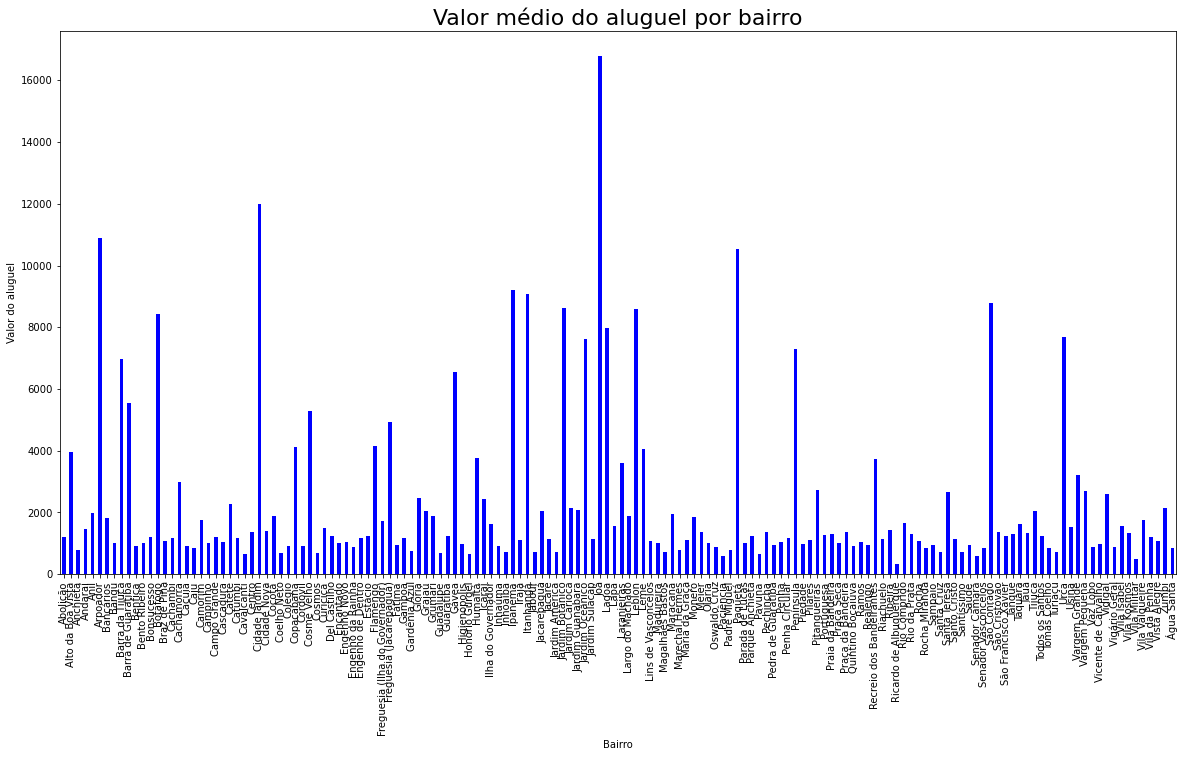

In [50]:
fig = grupo_bairros['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor médio do aluguel por bairro',{'fontsize':22})

# Relatório de análise VII

### Identificando e removendo outliers

<AxesSubplot:>

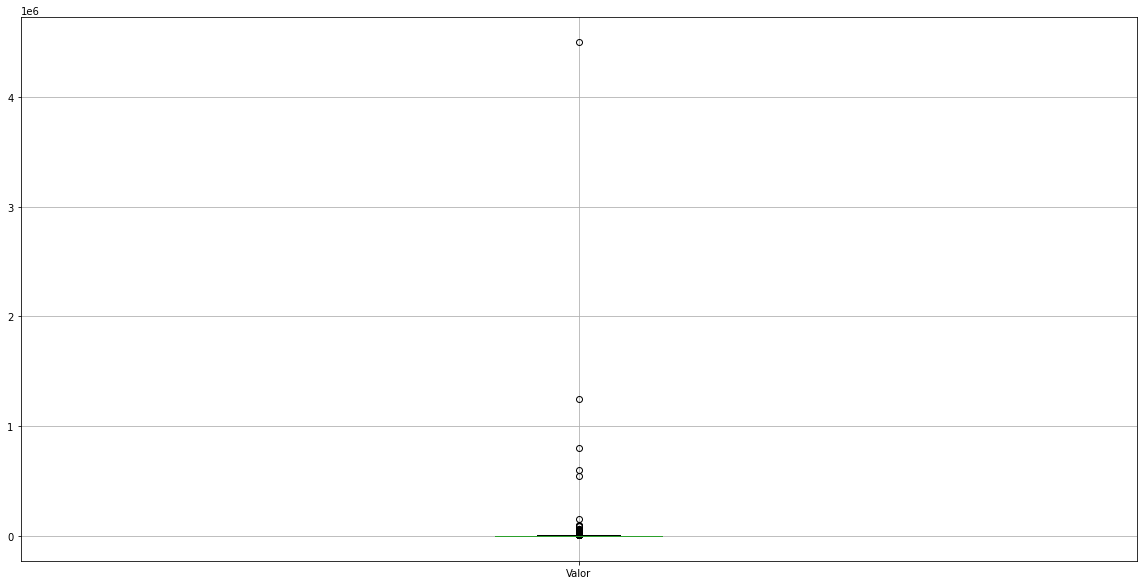

In [51]:
dataset_residencial.boxplot(['Valor'])

<AxesSubplot:>

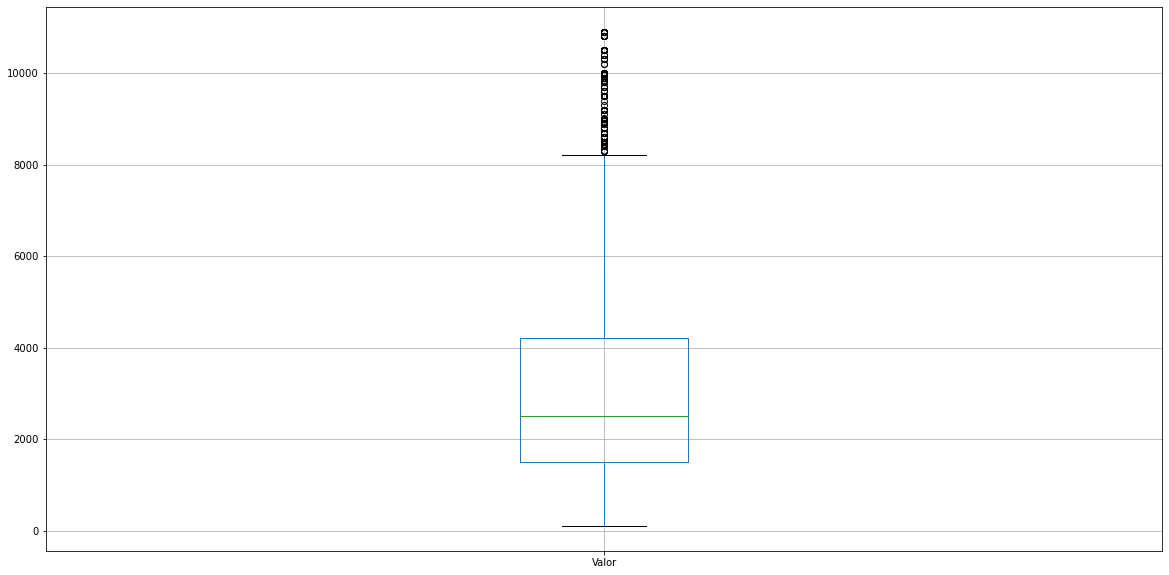

In [52]:
#Criando os quartis para tirar outliers
valor = dataset_residencial['Valor']

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
lim_inferior = Q1 - 1.5 * IIQ
lim_superior = Q3 + 1.5 * IIQ

selecao = (valor >= lim_inferior) & (valor<=lim_superior)
dados_new = dataset_residencial[selecao]

dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

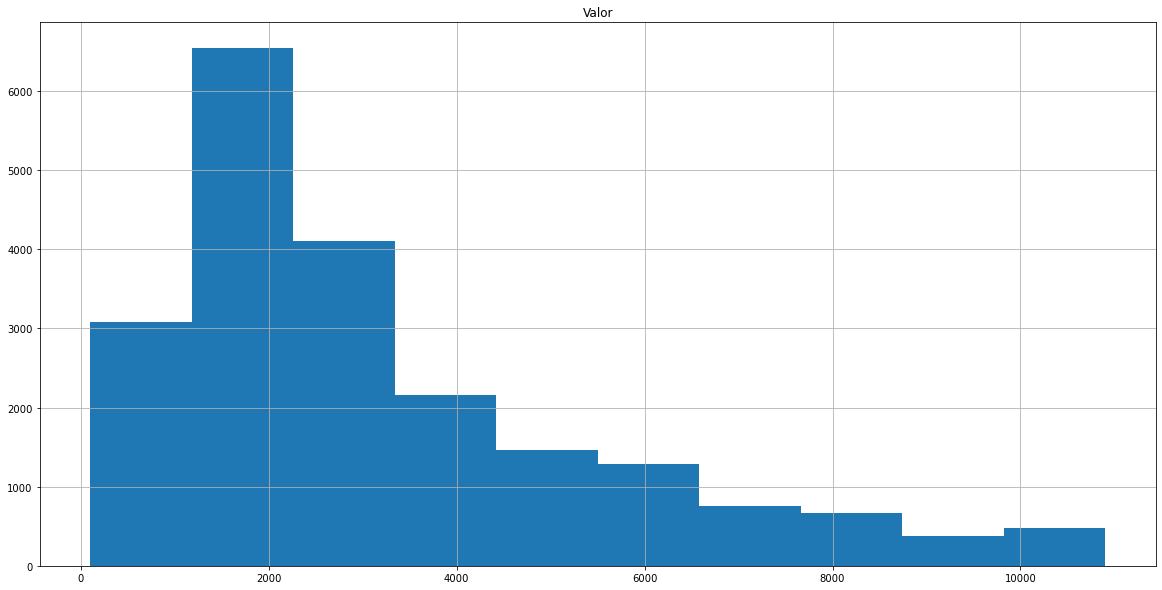

In [53]:
dados_new.hist(['Valor'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

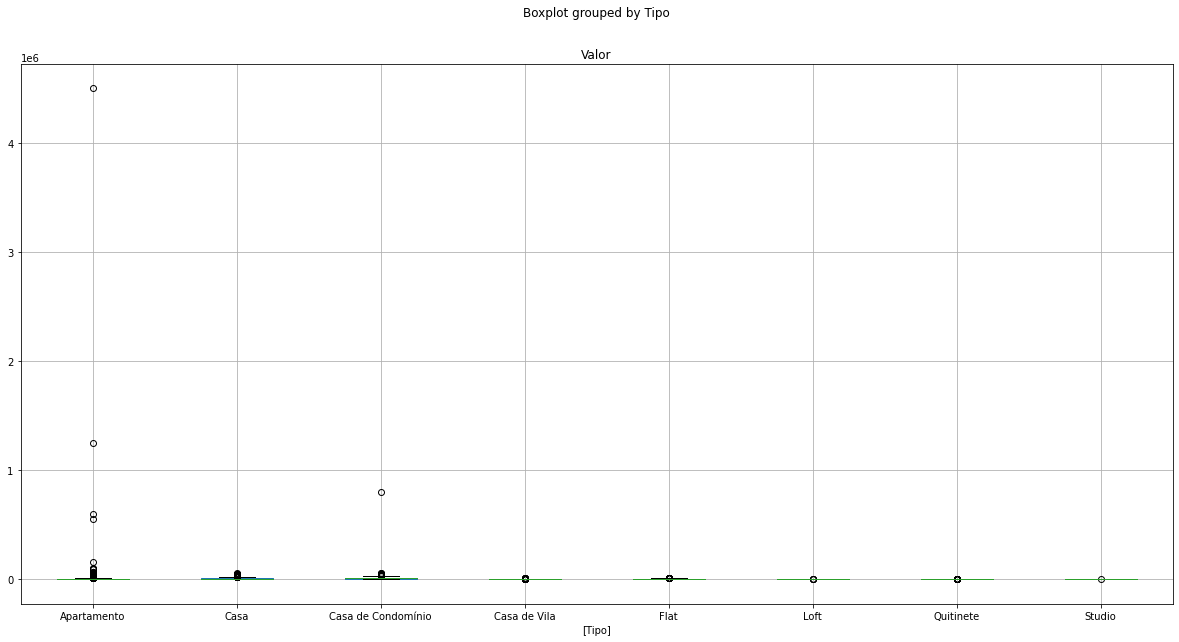

In [57]:
dataset_residencial.boxplot(['Valor'], by =['Tipo'])

In [64]:
grupo_tipo = dataset_residencial.groupby('Tipo')['Valor']
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
lim_inferior = Q1 - 1.5 * IIQ
lim_superior = Q3 + 1.5 * IIQ

dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dataset_residencial['Tipo'] == tipo
    
    eh_dentro_limite = (dataset_residencial['Valor'] >= lim_inferior[tipo]) & (dataset_residencial['Valor']<=lim_superior[tipo])
    
    selecao = eh_tipo & eh_dentro_limite
    
    dados_selecao = dataset_residencial[selecao]
    dados_new = pd.concat([dados_new,dados_selecao])


<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

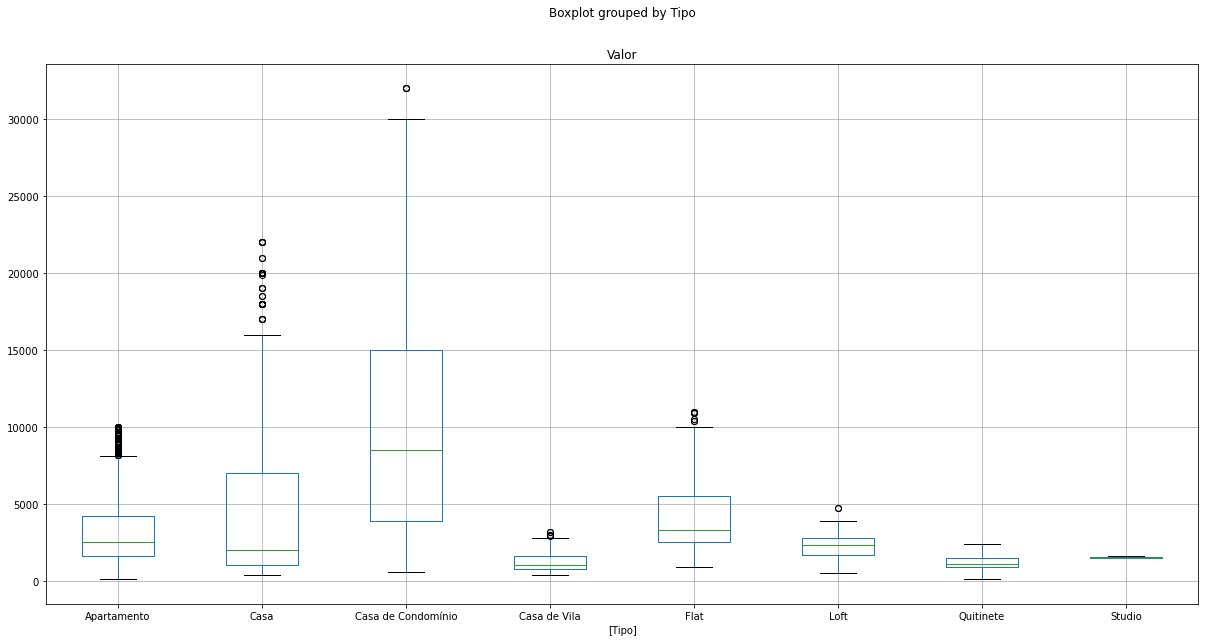

In [62]:
dados_new.boxplot(['Valor'], by =['Tipo'])

In [65]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv',sep=';',index=False)